<a href="https://colab.research.google.com/github/hectorcamachoz/Regresion_lineal_multivariable/blob/main/A1_3_594557.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1.3 Regresion lineal multiple
**1.** Importare los datos de la base de datos NASA.csv he imprimiere en consola las primer 15 lineas de datos, junto con el tamaño del dataframe

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('NASA.csv')
print(df.shape)
print(df.head(15))

(1503, 6)
    frecuencia  angulo  longitud  velocidad   espesor  presion
0          800     0.0    0.3048       71.3  0.002663  126.201
1         1000     0.0    0.3048       71.3  0.002663  125.201
2         1250     0.0    0.3048       71.3  0.002663  125.951
3         1600     0.0    0.3048       71.3  0.002663  127.591
4         2000     0.0    0.3048       71.3  0.002663  127.461
5         2500     0.0    0.3048       71.3  0.002663  125.571
6         3150     0.0    0.3048       71.3  0.002663  125.201
7         4000     0.0    0.3048       71.3  0.002663  123.061
8         5000     0.0    0.3048       71.3  0.002663  121.301
9         6300     0.0    0.3048       71.3  0.002663  119.541
10        8000     0.0    0.3048       71.3  0.002663  117.151
11       10000     0.0    0.3048       71.3  0.002663  115.391
12       12500     0.0    0.3048       71.3  0.002663  112.241
13       16000     0.0    0.3048       71.3  0.002663  108.721
14         500     0.0    0.3048       55.5  

**2.** Como segundo paso, en el siguiente bloque de codigo, se separara el dataframe en partes el 70 por ciento de los datos, se usaran para el modelo y el 30 para validar sus resultados. Es importante recalcar, que se separaran de forma aleatoria. Se utilizara la funcion train_test_split, de la libreria sklearn.model_selection

In [5]:
# Para utilizar train_test_split() se importa de sklearn.model_selection
train, test = train_test_split(df, train_size=0.7)
print(train.shape)
print(test.shape)
print(train.shape[0] , '+', test.shape[0] ,'=', int(train.shape[0]) + int(test.shape[0]))

(1052, 6)
(451, 6)
1052 + 451 = 1503


Podemos observar que la separacion de la base de datos fue exitosa, ya que la suma de ambas observaciones, da el total de observaciones de nuestra base de datos.

**3.** Con la separacion de la base de datos llamada train, se creara un modelo de regresion lineal multivariable, para poder predecir a la variable "presion", utilizando como entrada el resto de variables que tenemos.

In [6]:
x = train.drop('presion',axis=1)
y = train.presion
modelo = sm.OLS(y,sm.add_constant(x))
results = modelo.fit()
print(results.summary())
print('\nLos p-values son los siguientes: \n', results.pvalues)

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     213.1
Date:                Thu, 30 Jan 2025   Prob (F-statistic):          8.80e-157
Time:                        01:45:28   Log-Likelihood:                -3145.5
No. Observations:                1052   AIC:                             6303.
Df Residuals:                    1046   BIC:                             6333.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.0169      0.656    202.628      0.0

**4.** En el siguiente bloque, se observaran los datos anteriores, y se haran algunas conclusiones. Al observar los datos estadisticos anteriores, se puede concluir que si existen variables con una relacion significativa a la presion, ya que, si nos fijamos en los p-values de las variables x, nos podemos dar cuenta que todos son mucho menores a 0.05, que es nuestro valor de alpha. Por lo tanto, podemos concluir que todas las variables de entrada tienen una relacion significativa con la salida. Ademas, se puede decir que la variable mas importante del modelo

In [7]:
print('Al observar los datos estadisticos anteriores, se puede concluir que si')
print('existen variables con una relacion significativa a la presion, ')
print('ya que, si nos fijamos en los p-values de las variables x,')
print('nos podemos dar cuenta que todos son mucho menores a 0.05, que es nuestro')
print('valor de alpha.')
print('Por lo tanto, podemos concluir que todas las variables de entrada')
print('tienen una relacion significativa con la salida.')
print('Ademas se puede decir que la variable que mas efecto tiene sobre la salida,')
print('es la del espesor, ya que cuenta con un coeficiente de 144.94')


Al observar los datos estadisticos anteriores, se puede concluir que si
existen variables con una relacion significativa a la presion, 
ya que, si nos fijamos en los p-values de las variables x,
nos podemos dar cuenta que todos son mucho menores a 0.05, que es nuestro
valor de alpha.
Por lo tanto, podemos concluir que todas las variables de entrada
tienen una relacion significativa con la salida.
Ademas se puede decir que la variable que mas efecto tiene sobre la salida,
es la del espesor, ya que cuenta con un coeficiente de 144.94


**5.** A continuación se calculara el Residual standard error y la R^2 del modelo, tanto para los datos de entranmiento, y para los de validacion.

In [8]:

#RSE y R^2 de datos de entrenamiento
y_pred1 = results.predict(sm.add_constant(x))
RSS = sum((y - y_pred1)**2)
RSE = np.sqrt(RSS/(train.shape[0]-5-1))
TSS = sum((y - np.mean(y))**2)
r2 = 1 - (RSS/TSS)
print('Sobre datos de entrenamiento: ')
print('RSE: ', RSE)
print('R^2: ', r2)


#RSE y R^2 de datos de validacion
y_valid = test.presion
x_valid = test.drop('presion',axis=1)
y_pred2 = results.predict(sm.add_constant(x_valid))

RSS = sum((y_valid - y_pred2)**2)
RSE = np.sqrt(RSS/(test.shape[0]-5-1))
TSS = sum((y_valid - np.mean(y_valid))**2)
r2 = 1 - (RSS/TSS)
print('\nSobre datos de validacion: ')
print('RSE: ', RSE)
print('R^2: ', r2)


Sobre datos de entrenamiento: 
RSE:  4.825496384889582
R^2:  0.5046627725177348

Sobre datos de validacion: 
RSE:  4.81072441530304
R^2:  0.5383546556904524


**6.** Para finalizar, se generara una grafica de dispersión para visualizar los resultados obtenidos.


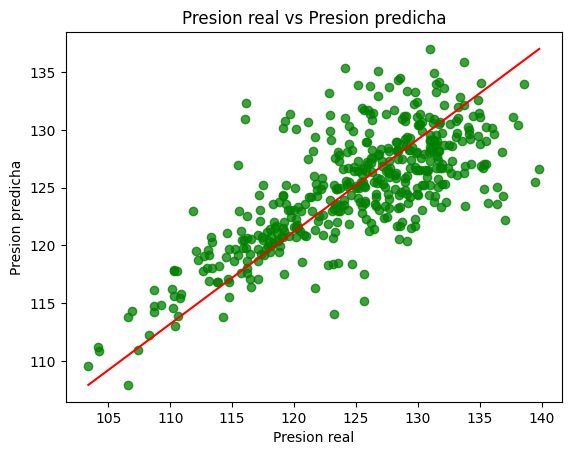

In [21]:
x = y_valid
y = y_pred2
plt.scatter(x, y, color='g', alpha = 0.75)
plt.xlabel('Presion real')
plt.ylabel('Presion predicha')
plt.title('Presion real vs Presion predicha')

plt.plot([min(x), max(x)], [min(y), max(y)], color='red')
plt.show()

Al observar la grafica se puede decir que este modelo es capaz de predecir la presion real, utilizando las variables de frecuencia, angulo, longitud, velocidad y espesor, con una confianza del 95%. Sin embargo, tambien se puede observar que algunos puntos estan muy alejados de la pendiente, esto nos quiere decir que hay variables de entrada que no son tan importantes para este modelo.